In [1]:
import numpy
import six.moves.cPickle as pickle
import theano

Using gpu device 0: Quadro K1100M (CNMeM is enabled with initial size: 95.0% of memory, cuDNN not available)


In [2]:
fileObject = open('data/best_SdA_model.pkl','r')
data_set = pickle.load(fileObject)

params = [numpy.array(dataset) for dataset in data_set]

In [3]:
def sigmoid(z):
    s = 1.0 / (1.0 + numpy.exp(-1.0 * z))
    return s

In [4]:
def get_hidden_values(input, W, b, active = None):
    if not active:
        return numpy.dot(input, W) + b
    else:
        return active(numpy.dot(input, W) + b)

In [5]:
def get_reconstructed_values(input, W_prime, b_prime, active = None):
    if not active:
        return numpy.dot(input, W_prime) + b_prime
    else:
        return active(numpy.dot(input, W_prime) + b_prime)

In [6]:
fileObject1 = open('data/samples1','r')
samples = pickle.load(fileObject1)

time_series = numpy.array(samples)

In [7]:
layers = [4,3,3]
hiddens = []
recons = []

In [8]:
n_layers = len(layers)
inputs = time_series
index = 0

In [9]:
for i in range(n_layers):
    outputs = get_hidden_values(inputs, params[index], params[index + 1], active=sigmoid)
    hiddens.append(outputs)
    inputs = outputs
    index += layers[i]

In [10]:
for i in range(n_layers - 1, -1, -1):
    index -= layers[i]
    if layers[i] == 4:
        outputs = get_reconstructed_values(inputs, params[index+3], params[index + 2])
    else:
        outputs = get_reconstructed_values(inputs, params[index].T, params[index + 2], active=sigmoid)
    recons.append(outputs)
    inputs = outputs

In [11]:
print recons[-1]

[[ 38.11447389  35.67132152  36.34243182 ...,  99.48572578  88.16298206
   93.85643409]
 [ 88.55834326  83.77608009  80.95402297 ...,  92.41812752  69.05159047
   86.04137718]
 [ 25.00397268  26.13734674  30.39938783 ...,  88.4126539   82.35197381
   86.47459649]
 ..., 
 [ 57.00949563  54.58397052  45.90179245 ...,  87.93980974  80.64935578
   58.80666032]
 [ 61.1088458   48.45870692  38.66631956 ...,  92.0780285   80.48641576
   63.15247257]
 [ 89.18197931  79.95938966  65.03762512 ...,  93.73528066  93.40702343
   85.1228842 ]]


In [12]:
def dtw(list1, list2, window = 1):
    len1 = len(list1)
    len2 = len(list2)
    mat = [[float('inf') for x in range(len2 + 1)] for y in range(len1 + 1)]
    mat[0][0] = 0
    for i in range(len1 + 1):
        if i - window <= 1:
            start = 1
        else:
            start = i - window
        
        if i + window <= len2:
            end = i + window
        else:
            end = len2
        for j in range(start, end + 1):
            cost = abs(float(list1[i - 1] - list2[j - 1]))
            mat[i][j] = cost + min(mat[i-1][j], mat[i][j-1],mat[i-1][j-1])
        
    return mat[len1][len2]

In [13]:
def euclideanDist(list1,list2):
    distance = 0
    for x in range(len(list1)):
        distance += pow((list1[x]-list2[x]),2)
    return math.sqrt(distance)

In [14]:
import math

In [15]:
distance0 = []

In [16]:
for i in range(1000):
    distance0.append((i,dtw(time_series[i], time_series[-1])))

In [17]:
Original_result = sorted(distance0, key=(lambda x: x[1]))

In [18]:
distance1 = []

In [19]:
for i in range(1000):
    distance1.append((i, euclideanDist(hiddens[-1][i], hiddens[-1][-1])))

In [20]:
Euclidean_16_result = sorted(distance1, key=(lambda x: x[1]))

In [21]:
Original_result[:10]

[(405, 118.0),
 (701, 120.0),
 (211, 144.0),
 (789, 146.0),
 (543, 157.0),
 (199, 160.0),
 (167, 161.0),
 (63, 163.0),
 (839, 173.0),
 (753, 175.0)]

In [22]:
Euclidean_16_result[:10]

[(99, 0.7338474822219853),
 (207, 0.7361917135251163),
 (503, 0.7547665658163157),
 (143, 0.7818312310716204),
 (239, 0.8528829196232515),
 (619, 0.8666111743554057),
 (165, 0.876925895743165),
 (779, 0.8913663551880779),
 (917, 0.9343050486865133),
 (157, 0.9598424428853842)]

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

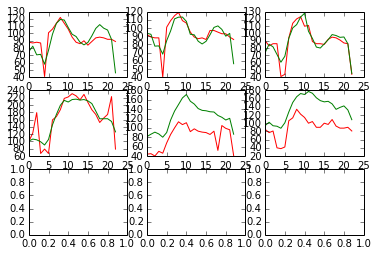

In [81]:
fig = plt.figure()
Xaxis = range(23)
for i in range(3):
    for j in range(3):
        ax = plt.subplot2grid((3,3), (i, j))
        #plt.plot(Xaxis, time_series[i * 3 + j+ 9991], 'r')
        #plt.plot(Xaxis, recons[-1][i * 3 + j + 9991], 'g')
        if i == 0 and j == 0:
            plt.plot(Xaxis, time_series[405],'r')
            plt.plot(Xaxis, recons[-1][405],'g')
        elif i == 0 and j == 1:
            plt.plot(Xaxis, time_series[701],'r')
            plt.plot(Xaxis, recons[-1][701],'g')
        elif i == 0 and j == 2:
            plt.plot(Xaxis, time_series[199],'r')
            plt.plot(Xaxis, recons[-1][199],'g')
        elif i == 1 and j == 0:
            plt.plot(Xaxis, time_series[661],'r')
            plt.plot(Xaxis, recons[-1][661],'g')       
        elif i == 1 and j == 1:
            plt.plot(Xaxis, time_series[243],'r')
            plt.plot(Xaxis, recons[-1][243],'g') 
        elif i == 1 and j == 2:
            plt.plot(Xaxis, time_series[-1],'r')
            plt.plot(Xaxis, recons[-1][-1],'g') 

In [78]:
print hiddens[-1][-1]

[  9.98682244e-01   6.01392536e-01   9.65423693e-01   6.44290133e-01
   9.21902754e-01   9.75621413e-01   3.39320529e-01   7.42512695e-01
   9.99947238e-01   5.86587550e-03   1.42800251e-01   9.95372479e-01
   1.00000000e+00   7.19875692e-01   1.42824121e-04   1.20320581e-01]


In [79]:
print hiddens[-1][450]

[  4.89308377e-02   7.64490022e-01   9.43759533e-02   9.98006837e-01
   2.39351022e-04   5.30762101e-03   9.96234739e-01   3.91184670e-01
   1.44231203e-03   9.99238511e-01   5.59898059e-05   9.90329226e-01
   1.00000000e+00   9.90087789e-01   3.36382733e-01   7.16991629e-01]


In [21]:
for i in range(1000):
    distance1.append((i, euclideanDist(hiddens[0][i], hiddens[0][-1])))

In [22]:
Euclidean_128_result = sorted(distance1, key=(lambda x: x[1]))

In [24]:
d0 = map(lambda x: x[0], Original_result)
d1 = map(lambda x: x[0], Euclidean_128_result)

In [25]:
distance2 = []

In [28]:
d2 = map(lambda x: x[0], Euclidean_16_result)

In [86]:
#print d2

In [30]:
Original_result[:10]

[(263, 67.01492371106603),
 (199, 69.2314957226839),
 (789, 70.95068710026705),
 (839, 72.16647421067486),
 (187, 75.76938695805846),
 (63, 75.97367965289031),
 (211, 75.97367965289031),
 (143, 78.5175139698144),
 (818, 78.9746794865291),
 (885, 81.13568881817667)]

In [87]:
#print len(set(d2[:100]).intersection(set(d0[:100])))/100.0

In [32]:
Euclidean_16_result[:10]

[(11, 0.324312578286678),
 (993, 0.5210962429152207),
 (391, 0.5624145285849886),
 (335, 0.573028983572051),
 (585, 0.6586924960672079),
 (161, 0.6917722732581377),
 (715, 0.7656609198779841),
 (821, 0.7867285691523141),
 (367, 0.8412590006165529),
 (885, 0.8979025829190809)]

In [33]:
distance3 = []

In [35]:
for i in range(1000):
    distance3.append((i,euclideanDist(time_series[i], time_series[-2])))

In [37]:
Original_result_another = sorted(distance3, key=(lambda x: x[1]))

In [38]:
distance4 = []

In [39]:
for i in range(1000):
    distance4.append((i, euclideanDist(hiddens[-1][i], hiddens[-1][-2])))

In [40]:
Euclidean_16_result_another = sorted(distance4, key=(lambda x: x[1]))

In [44]:
Original_result_another[:50]

[(254, 59.799665550904216),
 (922, 60.778285596090974),
 (337, 61.7980582219215),
 (564, 63.05553108173778),
 (232, 68.81860213634101),
 (674, 69.18092222571191),
 (470, 69.34695379034324),
 (865, 69.3757882838098),
 (262, 69.88562083862459),
 (242, 71.32320800412724),
 (760, 71.386273190299),
 (80, 72.64984514780468),
 (838, 74.3370701601832),
 (210, 76.27581530209953),
 (238, 77.26577508832743),
 (507, 78.03204469959762),
 (66, 78.53661566428744),
 (76, 79.29060473977985),
 (187, 79.58643100428615),
 (336, 79.61155694998057),
 (500, 79.89993742175271),
 (867, 80.52328855678958),
 (143, 80.7093550959243),
 (916, 80.88881257627658),
 (884, 80.9814793641114),
 (788, 81.12336284942828),
 (198, 82.07313811473277),
 (255, 82.07313811473277),
 (62, 82.21921916437786),
 (166, 82.8914953418021),
 (466, 84.14273587185052),
 (752, 84.40971508067067),
 (700, 84.77617589865682),
 (662, 85.14693182963201),
 (587, 85.20563361656318),
 (268, 86.72369918309528),
 (375, 87.16077099245967),
 (195, 87.1

In [45]:
Euclidean_16_result_another[:20]

[(500, 0.3824923196869392),
 (232, 0.5100404755171017),
 (540, 0.6085905890665665),
 (736, 0.6433441856406433),
 (971, 0.6452617849848978),
 (364, 0.7401275979955443),
 (336, 0.7417951416995913),
 (242, 0.8211751725295074),
 (284, 0.8985529544313459),
 (976, 0.991423616687567),
 (610, 1.028376871728494),
 (867, 1.0575381419871548),
 (678, 1.0955294991249669),
 (974, 1.1126756668617965),
 (337, 1.1132969493960858),
 (541, 1.1165810840778472),
 (588, 1.1324101767385926),
 (160, 1.1330446843969972),
 (471, 1.1339595328883103),
 (210, 1.1418282919511893)]

In [89]:
#print DTW_result

In [84]:
print time_series[405]

[ 88  87  88  87  41 101 106 114 122 114 106  95  88  86  90  84  89  94
  95  94  92  92  89]


In [85]:
print time_series[-1]

[ 85  77  81  40  38  42 106 113 134 122 114 100 104  90  90 100  97 109
  93  88  88  90  81]


In [95]:
distance3 = []
for i in range(1000):
    distance3.append((i, euclideanDist(hiddens[-1][i], hiddens[-1][-1])))
Euclidean_16_result = sorted(distance3, key=(lambda x: x[1]))

In [96]:
d3 = map(lambda x: x[0], Euclidean_16_result)

In [97]:
print d3

[243, 661, 605, 501, 161, 553, 797, 217, 11, 199, 684, 346, 365, 937, 973, 839, 137, 53, 619, 518, 818, 972, 817, 865, 379, 885, 143, 503, 594, 633, 149, 297, 753, 630, 73, 863, 711, 467, 265, 789, 585, 749, 589, 995, 347, 601, 130, 474, 313, 745, 235, 339, 311, 567, 211, 851, 89, 925, 431, 269, 99, 882, 326, 415, 165, 95, 427, 445, 731, 92, 82, 701, 81, 917, 263, 443, 953, 604, 393, 285, 679, 129, 595, 131, 614, 33, 775, 669, 389, 737, 829, 967, 405, 41, 197, 459, 571, 383, 975, 602, 325, 119, 658, 321, 726, 167, 555, 823, 515, 931, 71, 713, 833, 107, 212, 153, 508, 331, 80, 543, 675, 59, 330, 853, 542, 739, 796, 545, 519, 367, 317, 751, 327, 969, 813, 659, 391, 262, 803, 631, 514, 368, 702, 177, 693, 345, 902, 764, 730, 850, 993, 768, 506, 77, 117, 127, 799, 105, 547, 419, 665, 239, 31, 123, 201, 254, 787, 615, 802, 247, 523, 923, 795, 673, 704, 816, 189, 527, 471, 58, 75, 809, 767, 216, 439, 681, 83, 765, 738, 709, 207, 23, 444, 375, 719, 315, 421, 587, 477, 956, 970, 222, 686, 464,

In [93]:
print d2

[661, 243, 605, 553, 518, 501, 346, 797, 161, 817, 839, 217, 973, 619, 143, 937, 503, 11, 53, 633, 137, 972, 199, 265, 365, 684, 818, 885, 589, 753, 865, 149, 995, 863, 789, 297, 594, 379, 89, 745, 445, 431, 41, 73, 129, 630, 711, 749, 427, 347, 130, 967, 235, 601, 82, 595, 474, 311, 467, 326, 585, 925, 95, 882, 269, 107, 197, 92, 679, 59, 567, 917, 81, 119, 313, 515, 731, 953, 131, 389, 829, 658, 415, 99, 443, 508, 669, 393, 775, 459, 726, 165, 851, 211, 713, 833, 331, 383, 212, 931, 153, 391, 701, 614, 321, 737, 571, 542, 975, 796, 339, 105, 75, 604, 167, 117, 602, 325, 285, 850, 659, 71, 514, 263, 767, 631, 527, 177, 201, 853, 317, 764, 803, 739, 902, 405, 615, 225, 620, 543, 702, 345, 247, 813, 802, 719, 330, 367, 993, 448, 681, 730, 665, 768, 523, 969, 519, 471, 421, 152, 555, 923, 327, 80, 239, 547, 419, 58, 189, 823, 825, 799, 254, 693, 751, 956, 439, 33, 5, 127, 545, 989, 924, 809, 31, 368, 569, 77, 315, 623, 675, 207, 781, 222, 795, 709, 487, 216, 123, 477, 765, 373, 779, 671,